# Ajuste de Oultiers
El presente notebook presenta un algoritmo para suavizar outliers en series temporales de variables ambientales. Se trabaja con los valores obtenidos por una red inalámbrica de sensores desplegada en un cultivo de cacao en una vereda del municipio de San Cayetano, Norte de Santander. Las mediciones analizadas corresponden a las variables Temperatura, Humedad Relativa, Humedad de la Tierra e Intensidad Lumínica.

### Importa los módulos necesarios y establece configuraciones

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import funs
from scipy.stats.stats import pearsonr
import warnings

C:\Users\Jergb\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


In [2]:
warnings.filterwarnings('ignore')
# Se define un límite para las filas de los dataframes que se presenten en el notebook
pd.options.display.max_rows = 10
plt.rcParams['figure.figsize'] = [16, 8]

In [3]:
# importamos los regitros de los nods 2, 3 y 5 para el segundo y el tecer periodo de medició
periodo = 2
periodo2 = {}
for i in [2,3,5]:
    periodo2[i] = pd.read_csv('nodo%d_periodo%d.csv'%(i,periodo),
                                           parse_dates=True,index_col=0)

periodo = 3
periodo3 = {}
for i in [2,3,5]:
    periodo3[i] = pd.read_csv('nodo%d_periodo%d.csv'%(i,periodo),
                                           parse_dates=True,index_col=0)

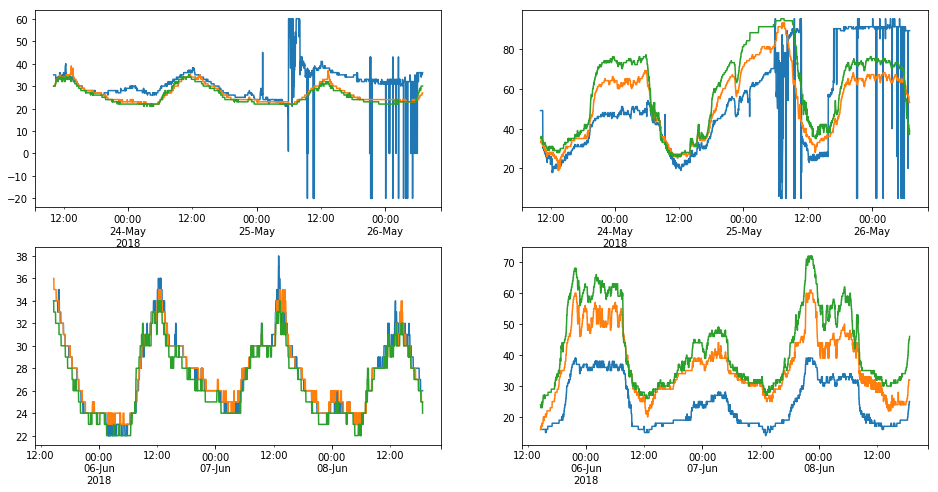

In [4]:
for i in [2,3,5]:
    plt.subplot(221)
    periodo2[i].loc[:,'TEMPERATURA'].plot()
    plt.subplot(222)
    periodo2[i].loc[:,'HUMEDAD RELATIVA'].plot()
    plt.subplot(223)
    periodo3[i].loc[:,'TEMPERATURA'].plot()
    plt.subplot(224)
    periodo3[i].loc[:,'HUMEDAD RELATIVA'].plot()

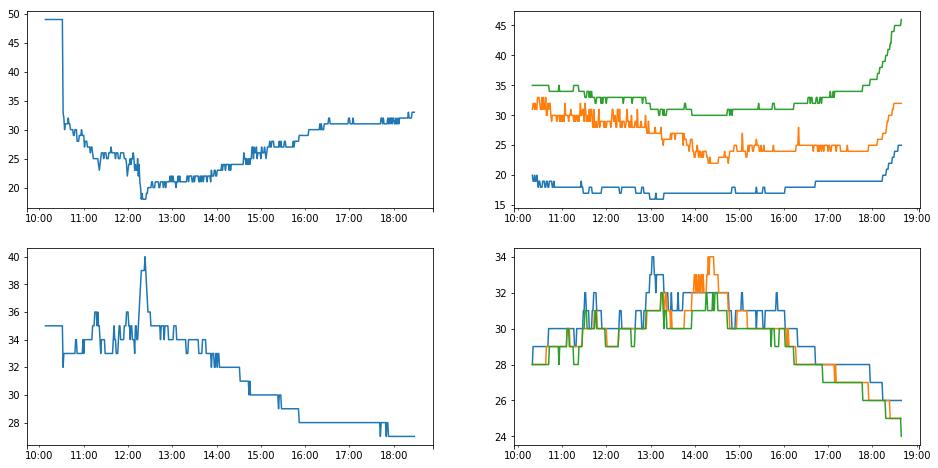

In [5]:
# Se grafican lo
plt.subplot(221)
ip2 = periodo2[2].index[0]
cp2 = periodo2[2].index[500]
ip3 = periodo3[2].index[0]
cp3 = periodo3[2].index[-500]

periodo2[2].loc[ip2:cp2,'HUMEDAD RELATIVA'].plot()

plt.subplot(222)
periodo3[2].loc[cp3:,'HUMEDAD RELATIVA'].plot()
periodo3[3].loc[cp3:,'HUMEDAD RELATIVA'].plot()
periodo3[5].loc[cp3:,'HUMEDAD RELATIVA'].plot()

plt.subplot(223)
periodo2[2].loc[ip2:cp2,'TEMPERATURA'].plot()

plt.subplot(224)
periodo3[2].loc[cp3:,'TEMPERATURA'].plot()
periodo3[3].loc[cp3:,'TEMPERATURA'].plot()
periodo3[5].loc[cp3:,'TEMPERATURA'].plot()

In [6]:
h = 24
t = 32
# corte y fin de p3

for i in [2,3,5]:
    display(i,periodo3[i].loc[:,:][periodo3[i].loc[:,'HUMEDAD RELATIVA']==h][periodo3[i].\
                                                              loc[:,'TEMPERATURA']==t].tail(10))

display(periodo2[2].loc[:,:][periodo2[2].loc[:,'HUMEDAD RELATIVA']==h][periodo2[2].\
                    loc[:,'TEMPERATURA']==t].head(10))

2

,HUMEDAD DE LA TIERRA,HUMEDAD RELATIVA,INTENSIDAD LUMÍNICA,TEMPERATURA


3

,HUMEDAD DE LA TIERRA,HUMEDAD RELATIVA,INTENSIDAD LUMÍNICA,TEMPERATURA
2018-06-08 14:01:00,1.30,24.0,5847.0,32.0
2018-06-08 14:04:00,1.46,24.0,5847.0,32.0
2018-06-08 14:06:00,1.30,24.0,5841.0,32.0
2018-06-08 14:07:00,1.46,24.0,5841.0,32.0
2018-06-08 14:10:00,1.46,24.0,5841.0,32.0
2018-06-08 14:12:00,1.30,24.0,5841.0,32.0
2018-06-08 14:13:00,1.30,24.0,5841.0,32.0
2018-06-08 14:14:00,1.46,24.0,5841.0,32.0
2018-06-08 14:15:00,1.46,24.0,5841.0,32.0
2018-06-08 14:40:00,1.30,24.0,5841.0,32.0


5

,HUMEDAD DE LA TIERRA,HUMEDAD RELATIVA,INTENSIDAD LUMÍNICA,TEMPERATURA


,HUMEDAD DE LA TIERRA,HUMEDAD RELATIVA,INTENSIDAD LUMÍNICA,TEMPERATURA
2018-05-23 14:07:00,82.35,24.0,5847.0,32.0
2018-05-23 14:09:00,82.35,24.0,5841.0,32.0
2018-05-23 14:10:00,82.35,24.0,5847.0,32.0
2018-05-23 14:11:00,82.51,24.0,5841.0,32.0
2018-05-23 14:13:00,82.51,24.0,5841.0,32.0
2018-05-23 14:14:00,82.51,24.0,5841.0,32.0
2018-05-23 14:15:00,82.51,24.0,5841.0,32.0
2018-05-23 14:16:00,82.51,24.0,5835.0,32.0
2018-05-23 14:18:00,82.35,24.0,5841.0,32.0
2018-05-23 14:20:00,82.19,24.0,5847.0,32.0


In [7]:
desde = pd.to_datetime('2018-05-23 14:16:00')
periodo_2 = periodo2[2].loc[desde:,:]

In [8]:
periodo_2.index[-1]-periodo_2.index[0]

Timedelta('2 days 16:44:00')

In [9]:
unir = pd.to_datetime('2018-06-08 14:15:00')

In [10]:
from datetime import timedelta
start = pd.to_datetime('2018-06-08 14:16:00')
end = start + timedelta(days=2) + timedelta(hours=16) + timedelta(minutes=44)
per = pd.date_range(start, end,freq='60s')
periodo_2.index = per

In [11]:
periodo_2

,HUMEDAD DE LA TIERRA,HUMEDAD RELATIVA,INTENSIDAD LUMÍNICA,TEMPERATURA
2018-06-08 14:16:00,82.51,24.0,5835.0,32.0
2018-06-08 14:17:00,82.19,23.0,5847.0,32.0
2018-06-08 14:18:00,82.35,24.0,5841.0,32.0
2018-06-08 14:19:00,82.19,23.0,5847.0,32.0
2018-06-08 14:20:00,82.19,24.0,5847.0,32.0
...,...,...,...,...
2018-06-11 06:56:00,70.15,89.0,5841.0,35.0
2018-06-11 06:57:00,69.99,89.0,5841.0,36.0
2018-06-11 06:58:00,70.15,89.0,5841.0,36.0
2018-06-11 06:59:00,70.15,89.0,5847.0,36.0


In [12]:
e = pd.concat([periodo3[3].loc[ip3:unir],periodo_2])
e.head()

,HUMEDAD DE LA TIERRA,HUMEDAD RELATIVA,INTENSIDAD LUMÍNICA,TEMPERATURA
2018-06-05 14:41:00,1.14,16.0,5847.0,36.0
2018-06-05 14:42:00,1.14,16.0,5847.0,36.0
2018-06-05 14:43:00,0.82,17.0,5847.0,36.0
2018-06-05 14:44:00,0.82,16.0,5847.0,35.0
2018-06-05 14:45:00,0.98,17.0,5847.0,35.0


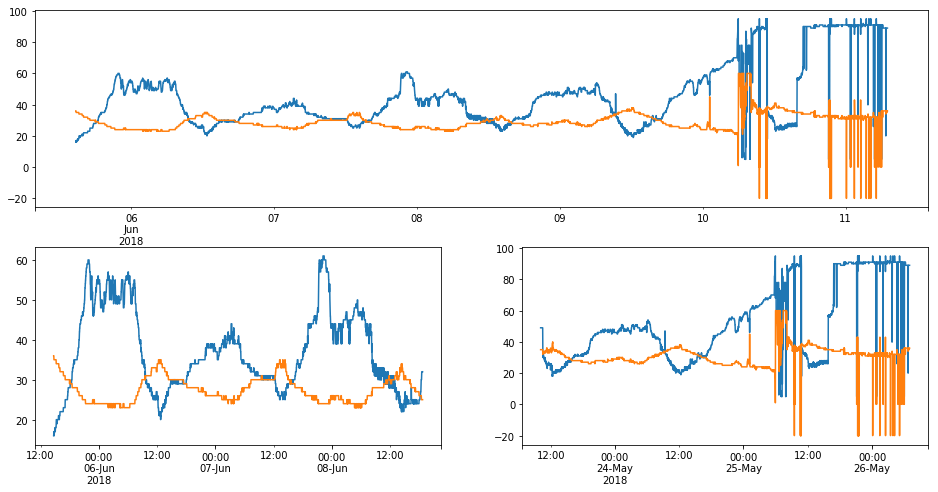

In [13]:
plt.figure(figsize=[16,8])
plt.subplot(211)
e['HUMEDAD RELATIVA'].plot()
e['TEMPERATURA'].plot()

plt.subplot(223)
periodo3[3].loc[:,'HUMEDAD RELATIVA'].plot()
periodo3[3].loc[:,'TEMPERATURA'].plot()

plt.subplot(224)
periodo2[2].loc[:,'HUMEDAD RELATIVA'].plot()
periodo2[2].loc[:,'TEMPERATURA'].plot()

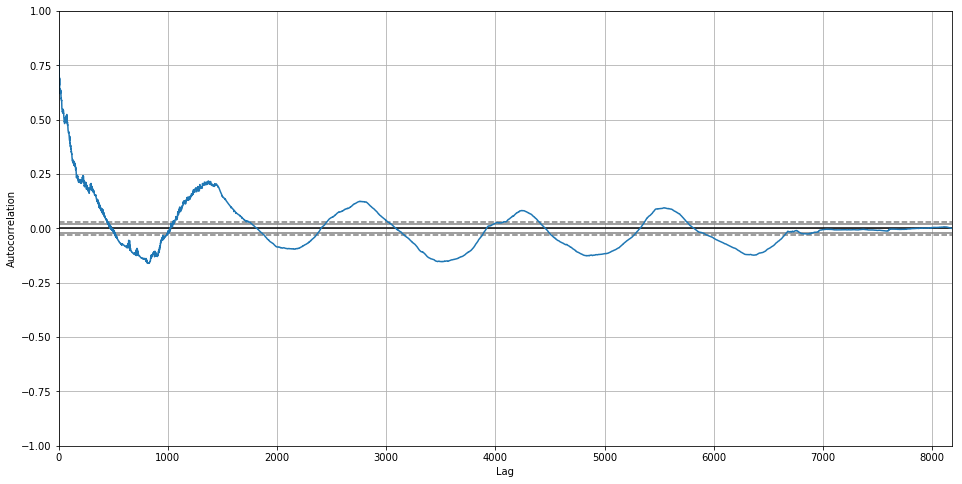

In [14]:
from pandas import Series
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
series = e.TEMPERATURA
autocorrelation_plot(series)
pyplot.show()

co = autocorrelation_plot(funs.ajustado.TEMPERATURA)
pyplot.show()
#Según la gráfica se tiene una buena correlación positiva hasta cerca del registro 100
# una de 0.5 en mas o menos 200 y así.....
co

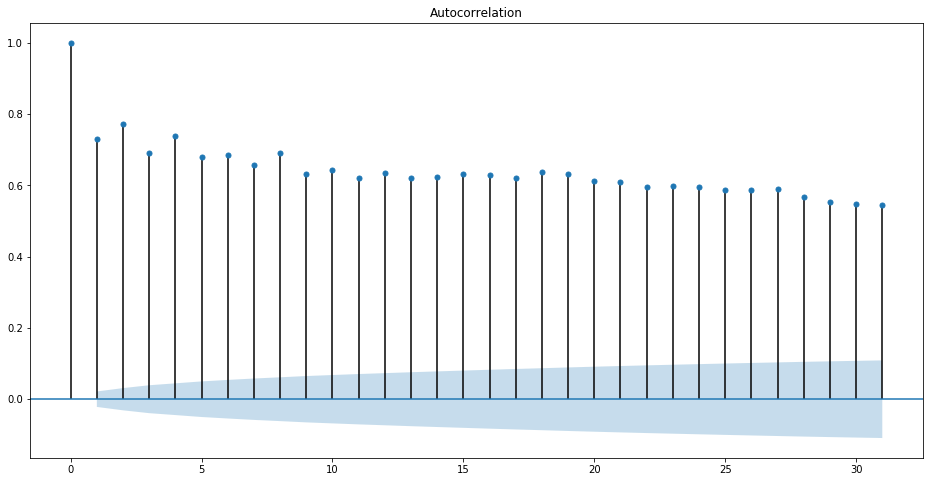

In [15]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = e.TEMPERATURA
a =plot_acf(series, lags=31)
pyplot.show()

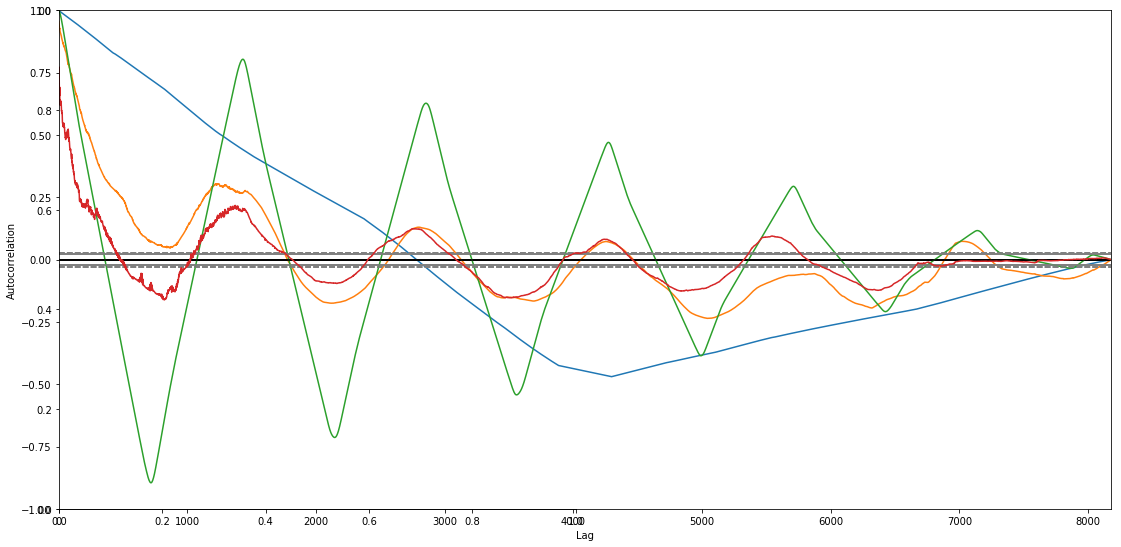

In [16]:
plt.subplot(121)
for i in e:
    autocorrelation_plot(e[i])
plt.tight_layout()

<Figure size 1152x576 with 0 Axes>

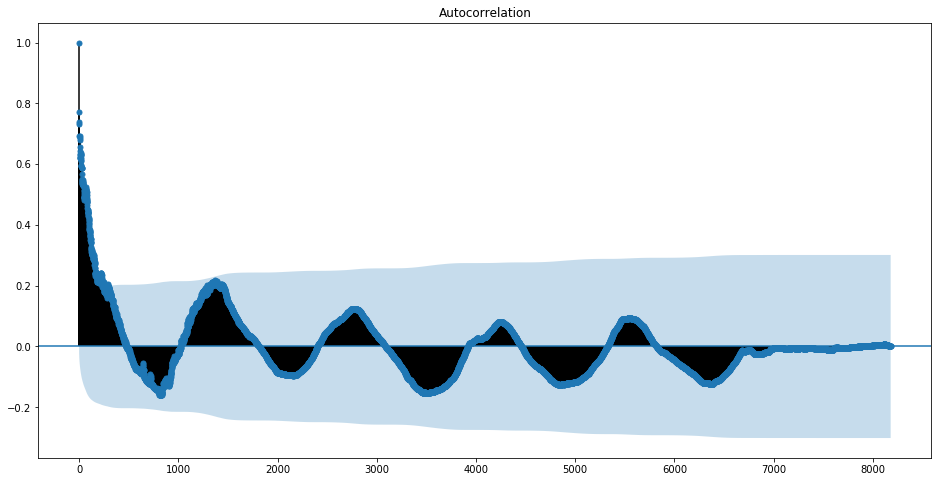

In [17]:
plt.figure()
plot_acf(series, lags=len(series)-1)

ax = plt.gca() # get axis handle
line = ax.lines[:]
x=[]
y=[]
for d in line:
    x.append(d.get_xdata())
    y.append(d.get_ydata())

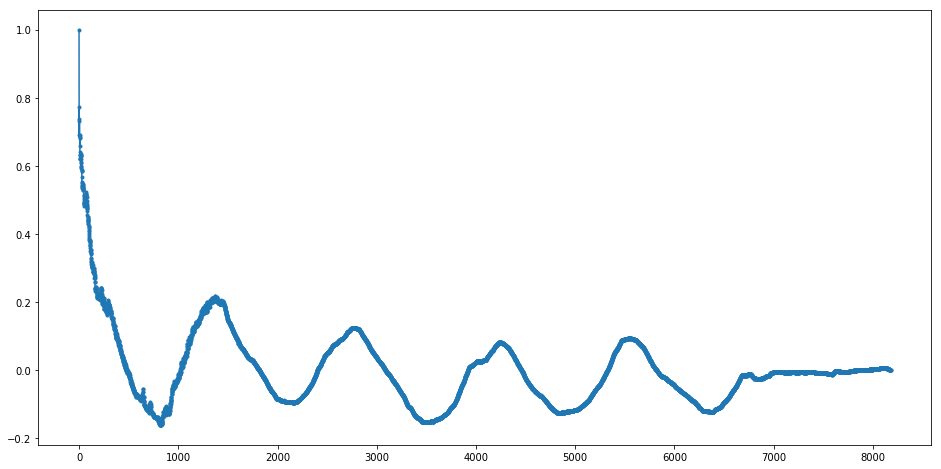

In [18]:
plt.plot(x[1],y[1],'.-')

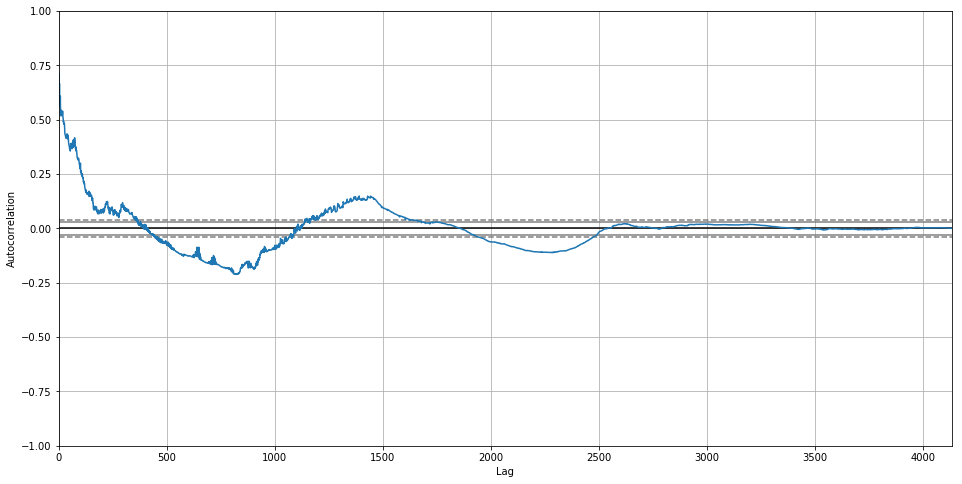

In [19]:
autocorrelation_plot(periodo2[2].TEMPERATURA)

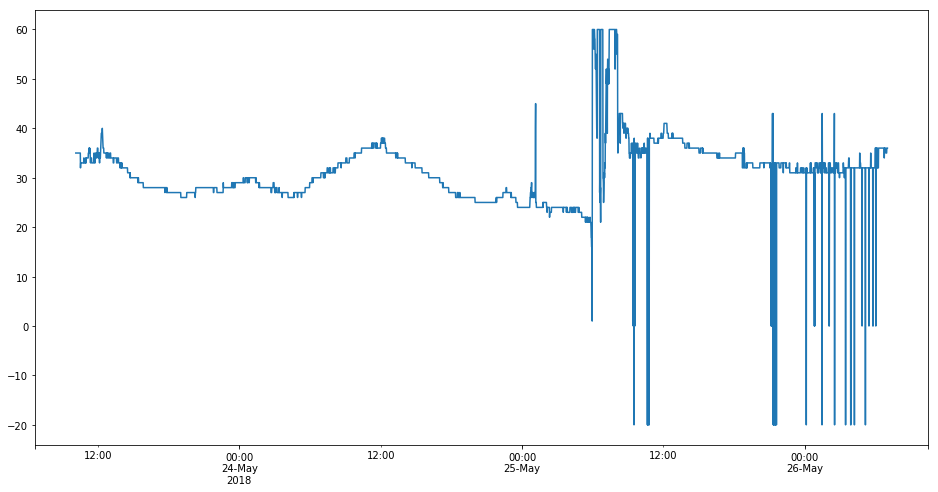

In [20]:
periodo2[2].TEMPERATURA.plot()

### Importa los registros de los nodos 2, 3 y 5 para el periodo 2

In [21]:
nodo = 2
periodo = 2
nodosp={}
for i in [2,3,5]:
    nodosp[i] = pd.read_csv('nodo%d_periodo%d.csv'%(i,periodo),
                                           parse_dates=True,index_col=0)

### Grafica las mediciones de los tres nodos en gráficas separadas para cada variable

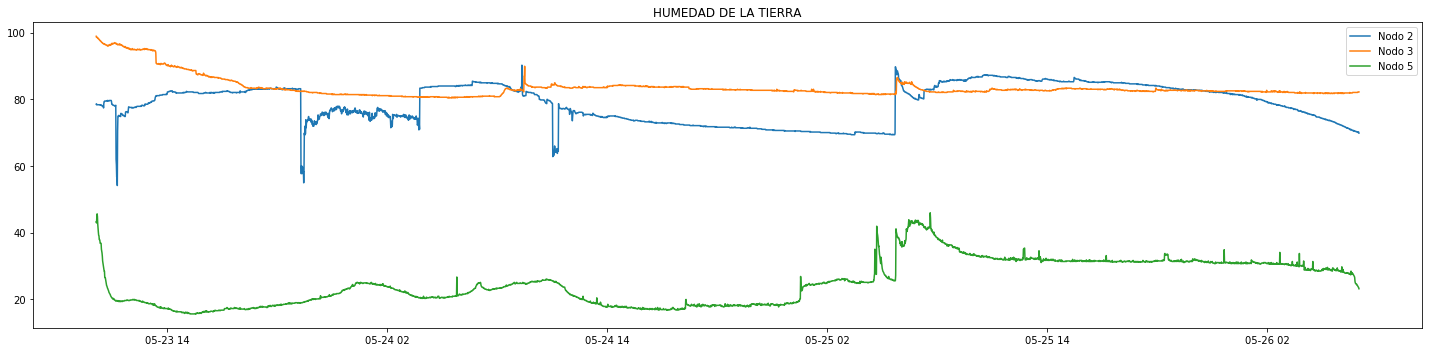

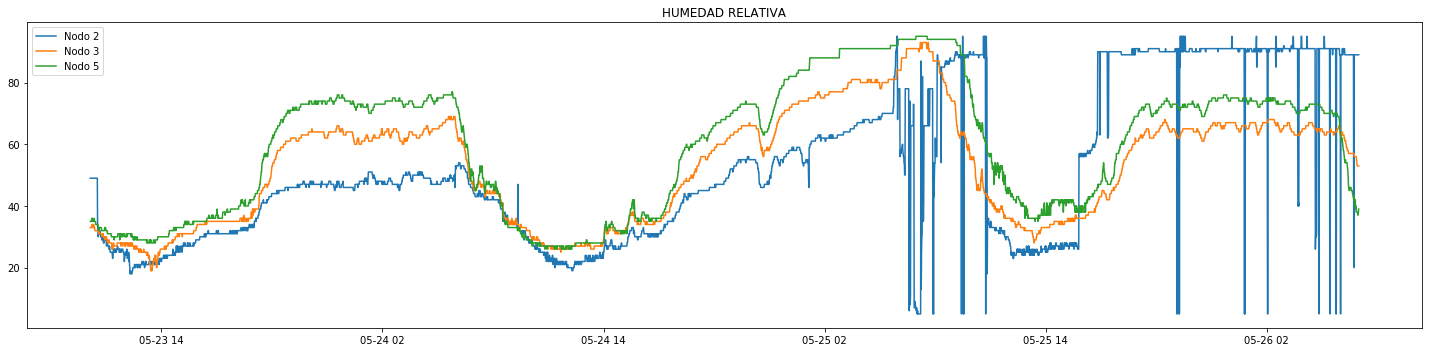

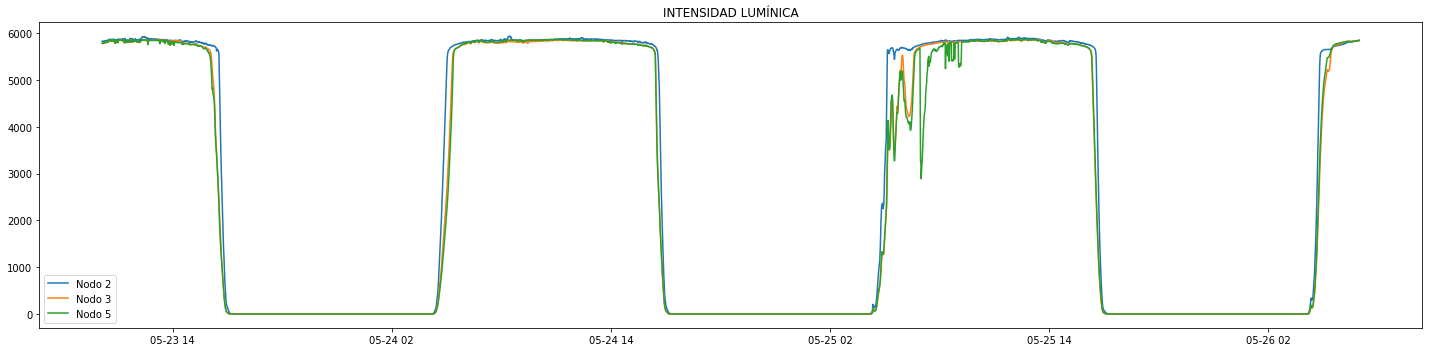

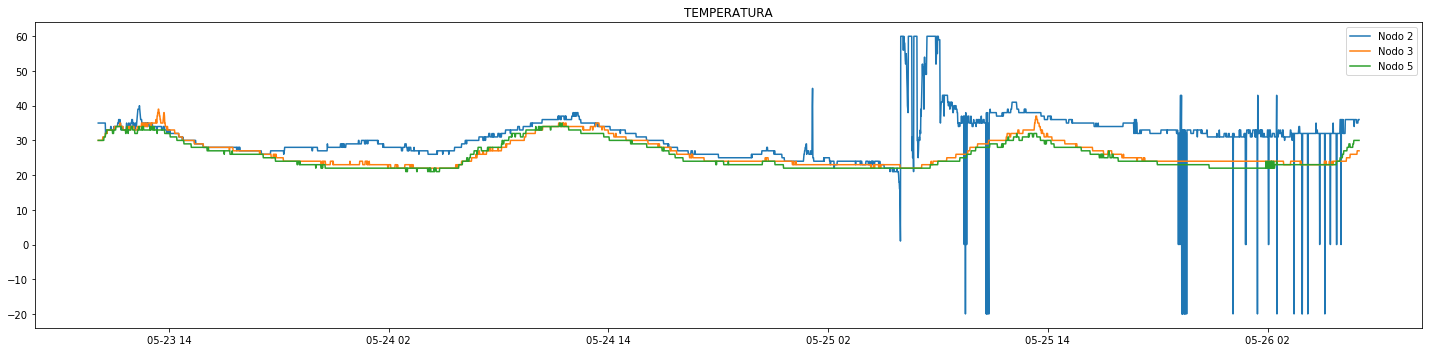

In [22]:
for i in range(4):
    plt.figure(figsize=[20,5])
    sub=510
    for n in nodosp:
        sub+=1
        plt.plot(nodosp[n].iloc[:,i],label='Nodo %d'%n)
        plt.title(nodosp[n].columns[i])
        plt.legend()
        plt.tight_layout()

### Se realizan copias del dataframe a analizar
- El llamado al módulo *funs* indica que la variable se utiliza en funciones del módulo *funs* de manera global.

In [23]:
raw = e
#raw = nodosp[2]
funs.raw = raw.copy()
# filtrar para realzar un filtro de valores atípicos
# según un rango dundicado por teclado.
funs.filtrar = raw.copy()
# filtrado almacena almacenar el dataframe luego de aplicar filtro.
funs.filtrado = raw.copy() 
# Ajustado almacena el dataframe luego de aplicar el suavizado.
funs.ajustado = raw.copy()

### Grafica las variables temperatura y humedad de la tierra, el gráfico de dispersión de las dos variables y presenta la correlación entre las dos

<center>**GRÁFICOS DE                      TEMPERATURA Y HUMEDAD RELATIVA**</center>

<center>$\rho = -0.01$                     </center>

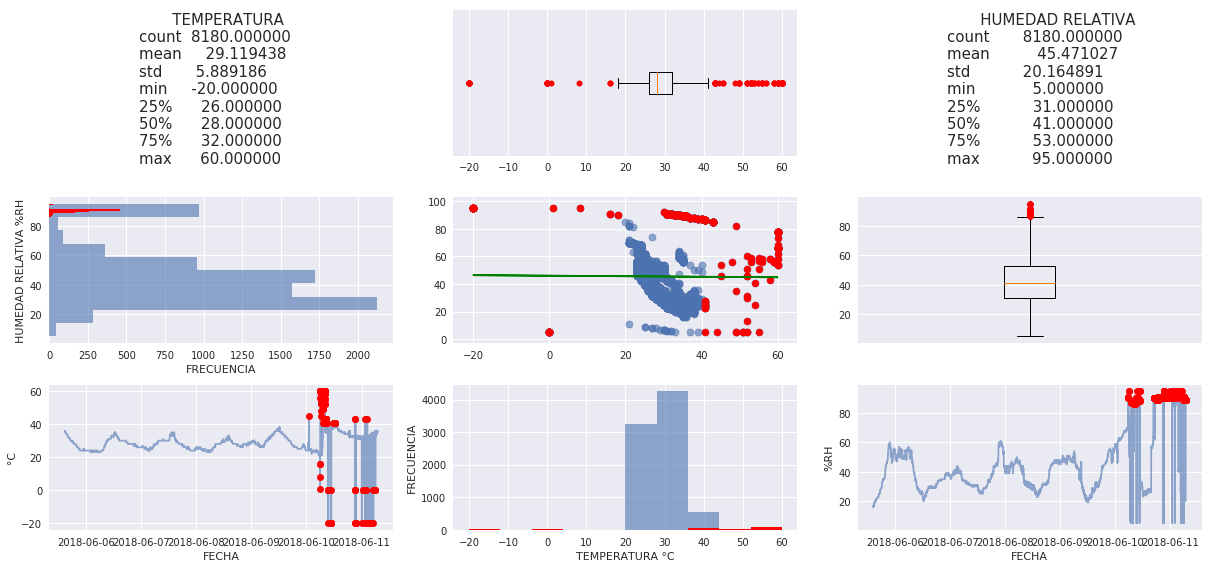

In [24]:
funs.info_relation(raw,'TEMPERATURA','HUMEDAD RELATIVA')

### Aplica un filtro de rango para los valores, basado en el criterio de Tukey y el rango de medición de los sensores

In [25]:
len(e.loc[e.index[0]:'2018-06-08 14:16:00'])

4296

In [ ]:
# para trabajar sólo los datos malos
start = 4296

for i in range(6):
    funs.filtrar_saltos('TEMPERATURA',23,37,start,i)

for i in range(6):
    funs.filtrar_saltos('HUMEDAD RELATIVA',18,100,start,i)

funs.info_relation(funs.filtrado,'TEMPERATURA','HUMEDAD RELATIVA')

In [ ]:
sns.heatmap(raw.corr(), annot=True, cmap='RdYlGn',fmt=".2f")
plt.figure()
sns.heatmap(funs.filtrado.corr(), annot=True, cmap='RdYlGn',fmt=".2f")

In [ ]:
# Ajuste de ventna deslizante, Se introduce la variable y la ventana
for i in range(1,5):
    funs.ajuste_variacion('TEMPERATURA',5*i)
plt.figure(figsize=[17,5])
plt.plot(funs.ajustado.iloc[:,3],label='Nodo 2')
plt.plot(nodosp[3].iloc[:,3],label='Nodo 3')
plt.plot(nodosp[5].iloc[:,3],label='Nodo 5')
plt.legend()
plt.show()

funs.info_relation(funs.ajustado,'TEMPERATURA','HUMEDAD RELATIVA')

In [ ]:
for i in range(1,10):
    funs.ajuste_variacion('HUMEDAD RELATIVA',5*i)

plt.figure(figsize=[17,5])
plt.plot(funs.ajustado.iloc[:,1],label='Nodo 2')
plt.plot(nodosp[3].iloc[:,1],label='Nodo 3')
plt.plot(nodosp[5].iloc[:,1],label='Nodo 5')
plt.legend()
plt.show()

funs.info_relation(funs.ajustado,'TEMPERATURA','HUMEDAD RELATIVA')

funs.ajuste_variacion('INTENSIDAD LUMÍNICA',200)
plt.figure(figsize=[17,5])
plt.plot(funs.ajustado.iloc[:,2],label='Nodo 2')
plt.plot(nodosp[3].iloc[:,2],label='Nodo 3')
plt.plot(nodosp[5].iloc[:,2],label='Nodo 5')
plt.legend()
plt.show()
plt.figure()
funs.info_relation(funs.ajustado,'INTENSIDAD LUMÍNICA','TEMPERATURA')

In [ ]:
sns.heatmap(raw.corr(), annot=True, cmap='RdYlGn',fmt=".2f")
plt.title('CORRELACIÓN DE LAS MEDICIONES DEL NODO %s' %nodo)
plt.figure()
sns.heatmap(funs.filtrado.corr(), annot=True, cmap='RdYlGn',fmt=".2f")
plt.title('MEDICIONES FILTRADAS DEL NODO %s' %nodo)
plt.figure()
sns.heatmap(funs.ajustado.corr(), annot=True, cmap='RdYlGn',fmt=".2f")
plt.title('MEDICIONES AJUSTADAS DEL NODO %s' %nodo)
plt.show()

In [ ]:
funs.ajustado.hist(figsize=[15,3])
plt.show()

In [ ]:
from IPython.display import display, Markdown, Latex
from scipy import stats
def relation(df,v1,v2,marca):
    'Permite visualizar la relación entre dos variables'
    df = df.loc[:,[v1, v2]].copy()
    corr = df.loc[:,[v1,v2]].corr().iloc[0,1]
    tabla = {'r':'ORIGINALES','d':'DUPLICADOS','a':'SUVIZADOS'}
    a=1  
    
    with plt.style.context(('seaborn')):

        plt.scatter(df[v1],df[v2],linewidths=.8,alpha=.6,label='Normales')
        x = df[v1]
        y = df[v2]
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        plt.plot(x, intercept + slope*x, 'g', label='Regresión Lineal')
                
        
        for v in [v1,v2]:
            li,ls = funs.tukey(df[v])
            try:
                ind = [[x,df[v][x]] for x in list(df[v].index)
                       if df[v].loc[x]<=li or df[v].loc[x]>=ls]
                df.loc[pd.DataFrame(ind).iloc[:,0],'o%d'%a] = pd.DataFrame(ind).iloc[:,1].values
                a+=1
                try:
                    plt.scatter(df['o1'],df[v2],color='r',label='Atípicos')
                except KeyError:
                    pass
                try: 
                    plt.scatter(df[v1],df['o2'],color='r',label='Atípicos')     
                except KeyError:
                    pass
                
            except (IndexError,NameError) as e:
                pass
    plt.xlabel('TEMPERATURA (°C)',fontsize=15)
    plt.ylabel('HUMEDAD RELATIVA (%RH)',fontsize=15)
    plt.legend()
    plt.title(r'VALORES %s $\rho$ = %.2f'%(tabla[marca],corr),fontsize=15)

import numpy as np
def graf(df,v1,marca):   
    'Permite visualizar la relación entre dos variables'
    global nodosp
    df = pd.DataFrame({v1:df.loc[:,v1].copy()})
    tabla = {'r':'ORIGINALES','d':'DUPLICADOS','s':'SUVIZADOS'}
    a=1      
    with plt.style.context(('seaborn')):

        plt.plot(df[v1],label='Nodo 2')
        plt.plot(nodosp[3].loc[:,v1],label='Nodo 3',color='orange')
        plt.plot(nodosp[5].loc[:, v1],label='Nodo 5',color='green')

        
        for v in [v1]:
            li,ls = funs.tukey(df[v])
            try:
                ind = [[x,df[v][x]] for x in list(df[v].index)
                       if df[v].loc[x]<=li or df[v].loc[x]>=ls]
                df.loc[pd.DataFrame(ind).iloc[:,0],'o%d'%a] = pd.DataFrame(ind).iloc[:,1].values
                a+=1
                try:
                    plt.plot(df['o1'],'ro',label='Atípicos')
                except KeyError:
                    pass
                
            except (IndexError,NameError) as e:
                pass
        plt.xlabel('FECHA',fontsize=15)
        plt.ylabel('%s'%v1,fontsize=15)
        plt.legend()
        if marca=='s':
            legend = plt.legend(title="NODOS",fancybox=True)
        else:
            legend = plt.legend(title="NODOS",fancybox=True)
        plt.title(r'VALORES %s'%(tabla[marca]),fontsize=15)

In [ ]:
with plt.style.context(('seaborn')):
    plt.figure(figsize=(20,6))
    plt.suptitle('GRÁFICOS DE DISPERSIÓN DE TEMPERATURA Y HUMEDAD RELATIVA',fontsize=15)
    plt.subplot(121)
    relation(raw,'TEMPERATURA','HUMEDAD RELATIVA','r')
    plt.subplot(122)
    relation(funs.ajustado,'TEMPERATURA','HUMEDAD RELATIVA','a')
    plt.savefig('disp.png', dpi=300)

In [ ]:
plt.figure(figsize=(20,6))
plt.suptitle('GRÁFICOS DE TEMPERATURA',fontsize=15)
plt.subplot(121)

graf(raw,'TEMPERATURA','r')
plt.subplot(122)

graf(funs.ajustado,'TEMPERATURA','s')
plt.savefig('graft.png', dpi=300)

In [ ]:
plt.figure(figsize=(20,6))
plt.suptitle('GRÁFICOS DE HUMEDAD RELATIVA',fontsize=15)
plt.subplot(121)
graf(raw,'HUMEDAD RELATIVA','r')

plt.subplot(122)

graf(funs.ajustado,'HUMEDAD RELATIVA','s')
plt.savefig('graf.png', dpi=300)

In [ ]:
nodosp[2].columns

In [ ]:
nodo = e

In [ ]:
inicio = nodo.index[0]
fin = nodo.index[-1]
h_t = nodo.columns[[1,3]]
for var in h_t:
    c = max([nodo.loc[:,var][nodo.index.hour==h].count() for h in range(12)])
    
    temp = pd.DataFrame(index=range(c))
    
    for h in range(24):
        temp[h] = pd.Series(nodo.loc[:,var][nodo.index.hour==h].values)
    det = temp.describe()
    
    plt.figure()
    temp.boxplot()
    plt.plot(range(1,25),det.loc['std',:],'-o',label='DESVIACIÓN ESTANDAR DIARIA')
    plt.plot(range(1,25),det.loc['mean',:],'-o',label='MEDIA DIARIA')
    plt.legend()
    plt.xlabel('HORA',fontsize=12)
    plt.ylabel('%s'%var,fontsize=12)
    plt.title('CLIMATOLOGíA DIARIA\n%s (%s a %s)'%(var,inicio,fin),fontsize=14)
    #plt.savefig('plot_%s.png'%nodo.columns[col], dpi=300)

In [ ]:
for var in h_t:
    c = max([funs.ajustado.loc[:,var][funs.ajustado.index.hour==h].count() for h in range(12)])
    
    temp = pd.DataFrame(index=range(c))
    
    for h in range(24):
        temp[h] = pd.Series(funs.ajustado.loc[:,var][funs.ajustado.index.hour==h].values)
    det = temp.describe()
    
    plt.figure()
    temp.boxplot()
    plt.plot(range(1,25),det.loc['std',:],'-o',label='DESVIACIÓN ESTANDAR DIARIA')
    plt.plot(range(1,25),det.loc['mean',:],'-o',label='MEDIA DIARIA')
    plt.legend()
    plt.xlabel('HORA',fontsize=12)
    plt.ylabel('%s'%var,fontsize=12)
    plt.title('CLIMATOLOGíA DIARIA\n%s (%s a %s)'%(var,inicio,fin),fontsize=14)
    #plt.savefig('plot_%s.png'%funs.ajustado.columns[col], dpi=300)

In [ ]:
funs.ajustado.to_csv('ajustado.csv')
e.to_csv('sin_ajustar.csv')